In [7]:
import torch
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
from vgg_pytorch import VGG 


In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [32]:
model = models.googlenet(num_classes=10).to(device)

In [4]:
model = models.vgg16(num_classes=10).to(device)

In [29]:
model = VGG.from_pretrained('vgg11', num_classes=10).to(device)

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to C:\Users\Lucien/.cache\torch\checkpoints\vgg11-bbd30ac9.pth



Loaded pretrained weights for vgg11


In [5]:
cifar_train_set = datasets.CIFAR10('./data/cifar10/', train = True, download = True)
cifar_test_set = datasets.CIFAR10('./data/cifar10/', train = False, download = True)

train_input = torch.from_numpy(cifar_train_set.data)
train_input = train_input.transpose(3, 1).transpose(2, 3).float().to(device)
train_target = torch.tensor(cifar_train_set.targets, dtype = torch.int64).to(device)

test_input = torch.from_numpy(cifar_test_set.data).float()
test_input = test_input.transpose(3, 1).transpose(2, 3).float().to(device)
test_target = torch.tensor(cifar_test_set.targets, dtype = torch.int64).to(device)

Extracting ./data/cifar10/cifar-10-python.tar.gz to ./data/cifar10/
Files already downloaded and verified


In [9]:
train_input.shape

torch.Size([50000, 3, 32, 32])

In [10]:
train_target.shape

torch.Size([50000])

In [11]:
test_input.shape

torch.Size([10000, 3, 32, 32])

In [12]:
test_target.shape

torch.Size([10000])

In [26]:
def train_model(model, optimizer, criterion, train_input, train_target, lr=0.005, batch_size=50, nb_epoch=8, weight_decay=0):
    optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    index_train_dl = DataLoader(range(len(train_input)), batch_size=batch_size, shuffle=True)

    for e in range(nb_epoch):
        print(e)
        for i, batch_indices in enumerate(index_train_dl):
            output = model(train_input[batch_indices])
            loss = criterion(output, train_target[batch_indices])
            if i % 10 == 0:
                print(loss)
                print(torch.sum(torch.max(output, 1).indices == train_target[batch_indices])/float(batch_size))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [33]:
sum(p.numel() for p in model.parameters())

9960638

In [34]:
loss = nn.CrossEntropyLoss().to(device)

train_model(model, torch.optim.Adam, loss, train_input, train_target, batch_size=200, lr=0.01)

0


AttributeError: 'GoogLeNetOutputs' object has no attribute 'log_softmax'

In [13]:
def show_target_pred(img, target, pred):
    npimg = img.numpy() / 255.0
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    correct = "✔" if target == pred else "x"
    plt.title(f"Ground truth: {target} {correct}", fontsize=15)
    plt.xlabel(f"Predicted: {pred}", fontsize=13)
    plt.show()

In [23]:
predictions = torch.max(model(test_input[:100]), 1).indices

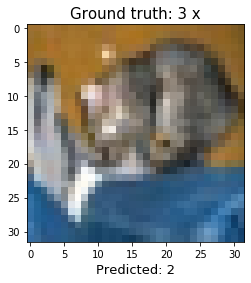

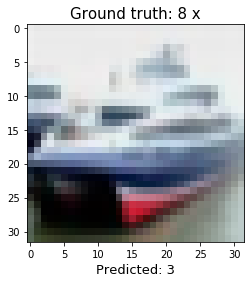

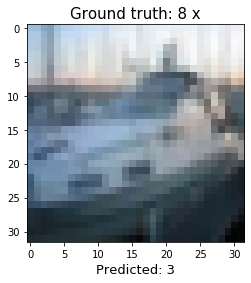

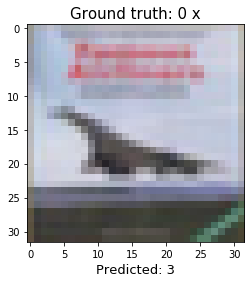

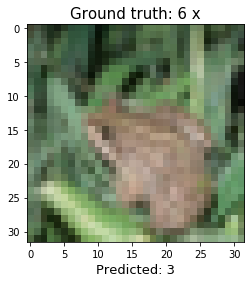

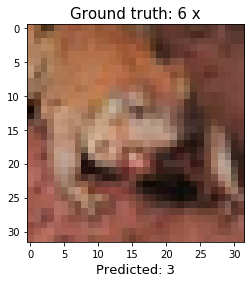

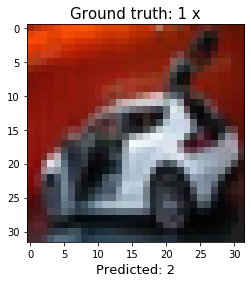

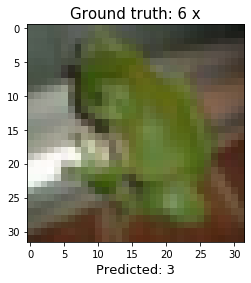

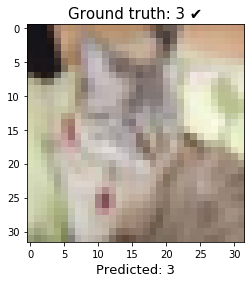

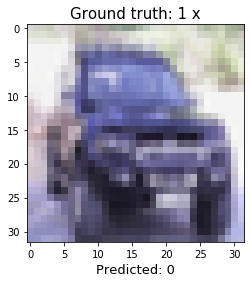

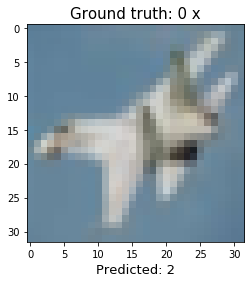

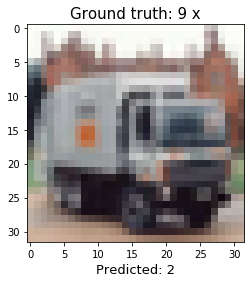

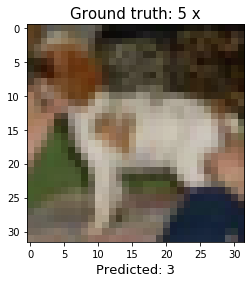

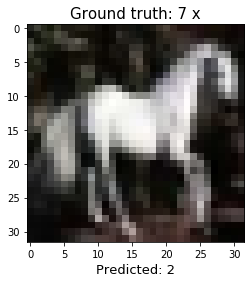

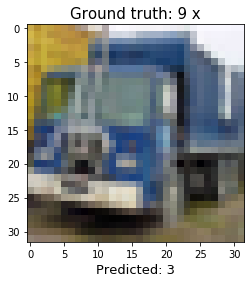

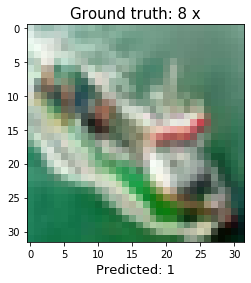

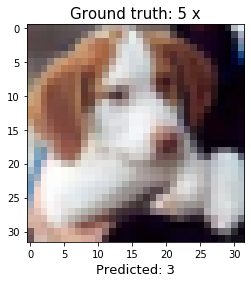

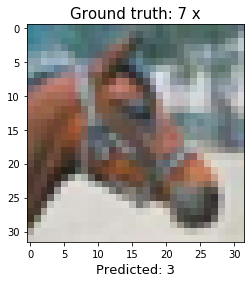

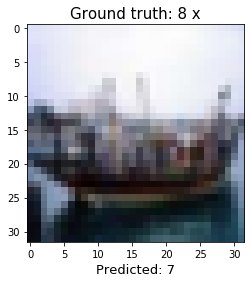

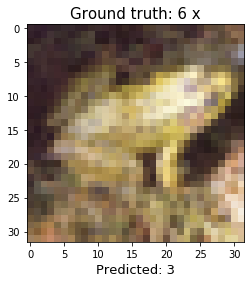

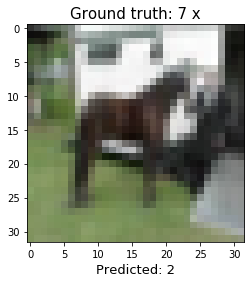

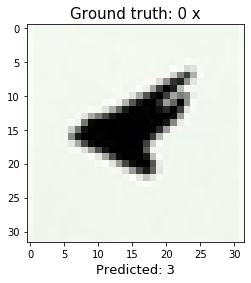

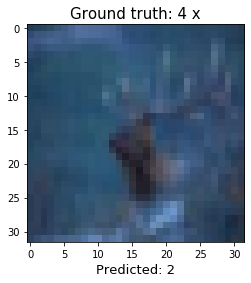

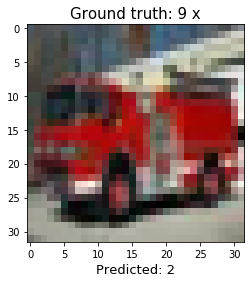

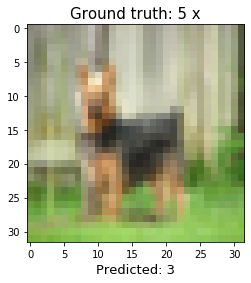

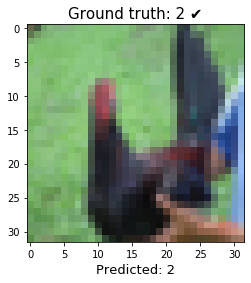

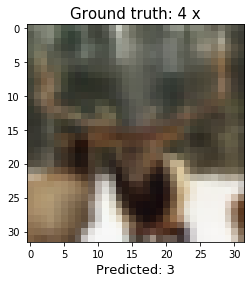

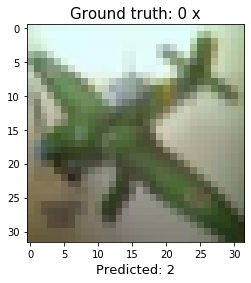

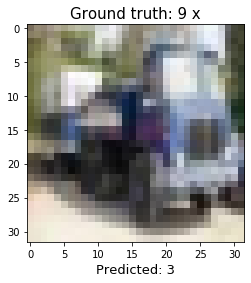

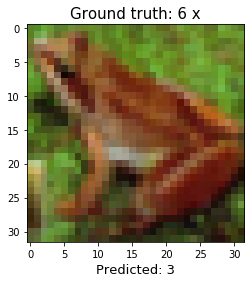

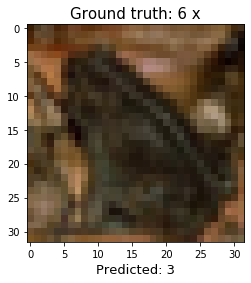

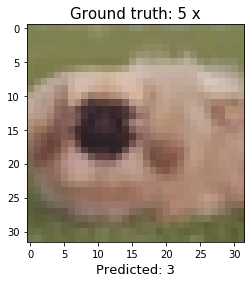

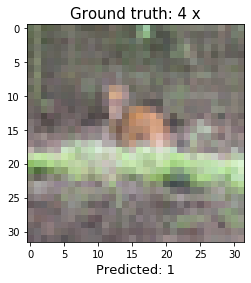

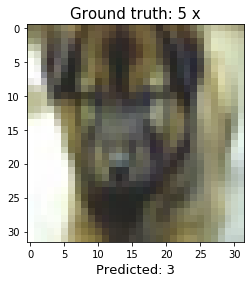

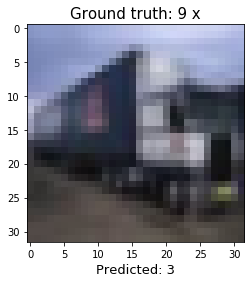

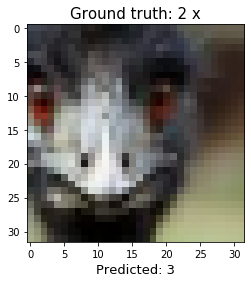

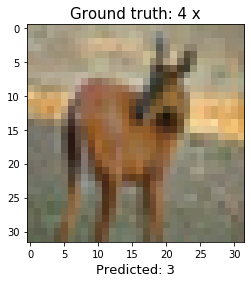

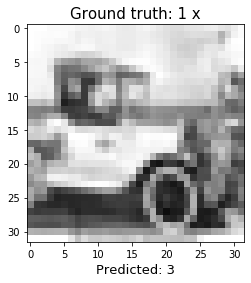

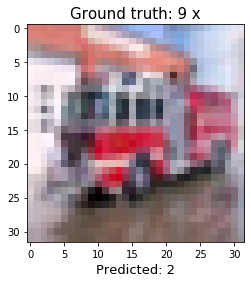

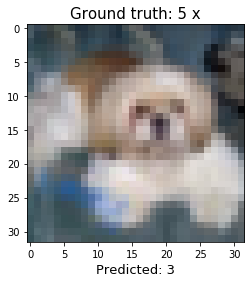

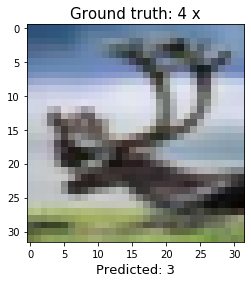

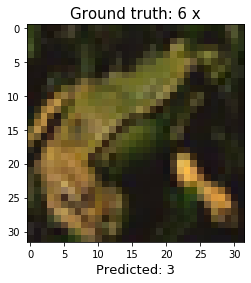

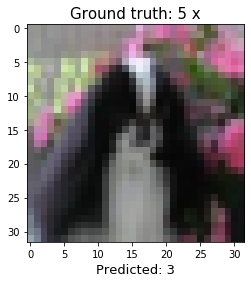

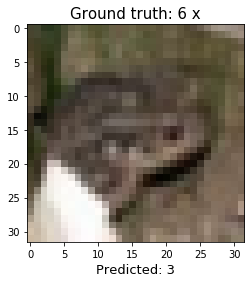

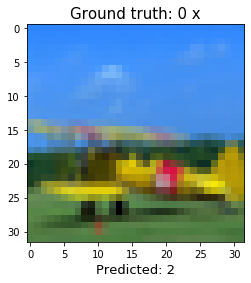

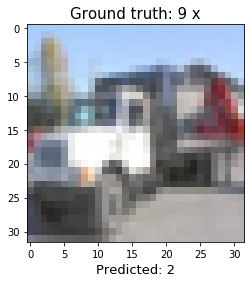

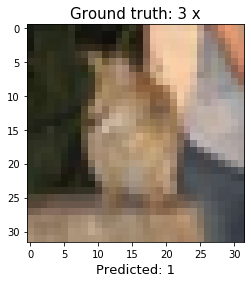

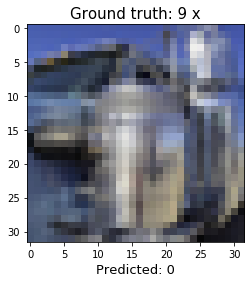

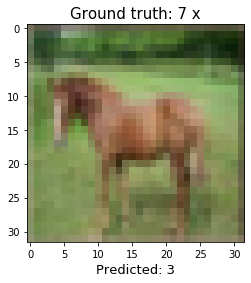

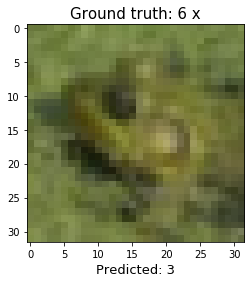

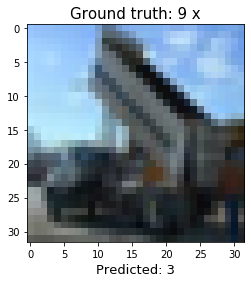

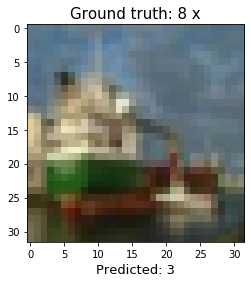

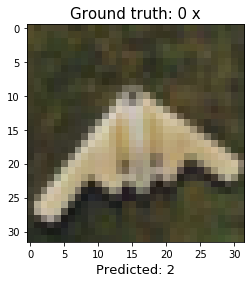

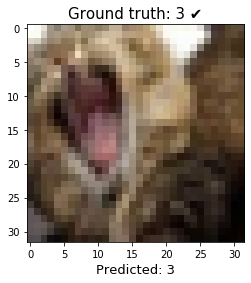

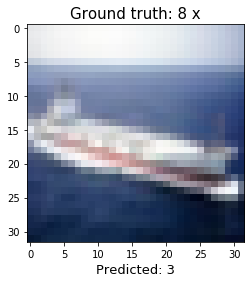

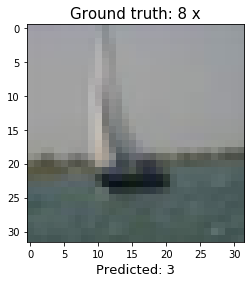

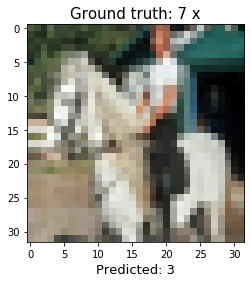

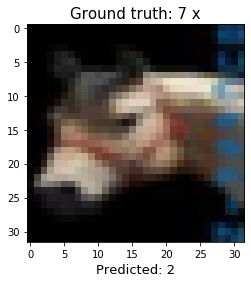

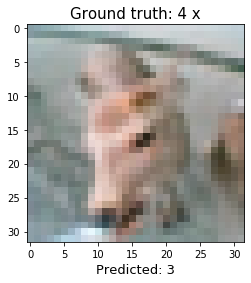

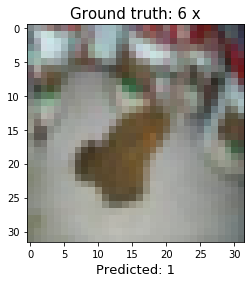

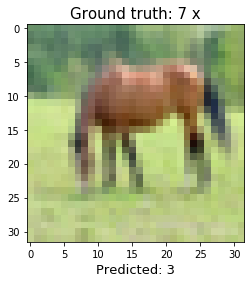

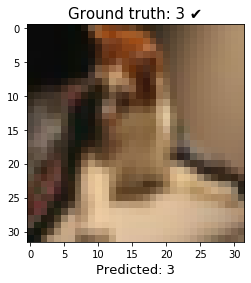

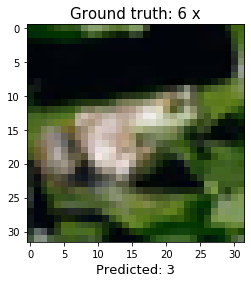

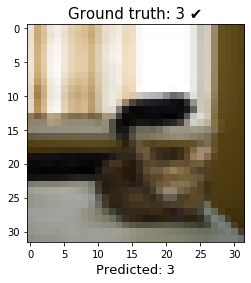

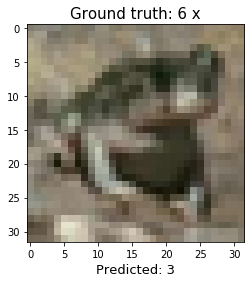

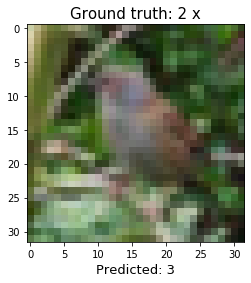

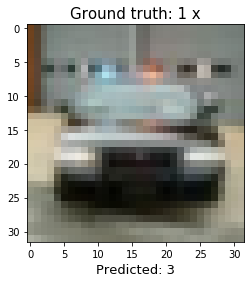

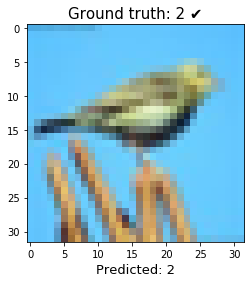

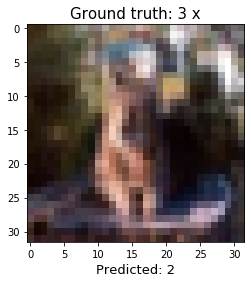

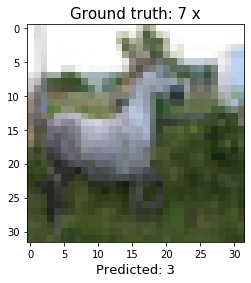

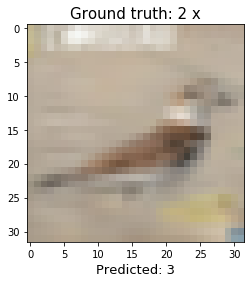

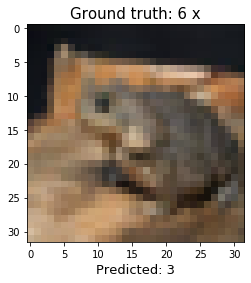

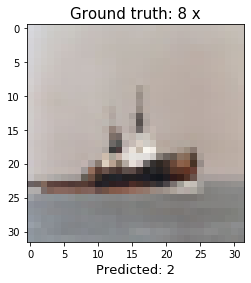

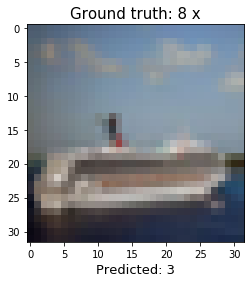

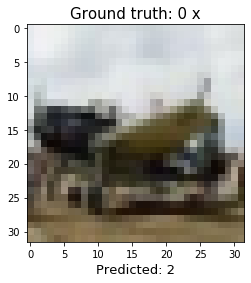

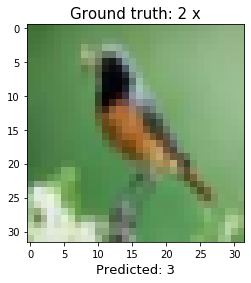

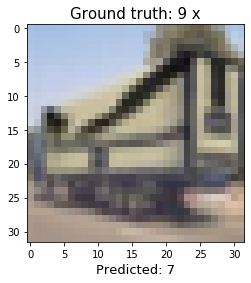

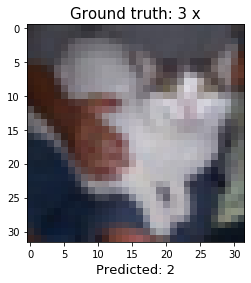

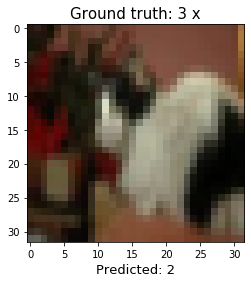

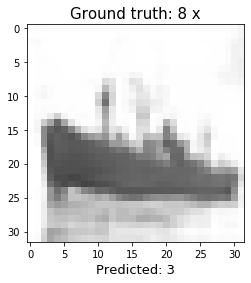

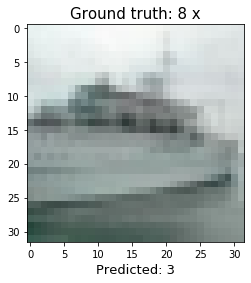

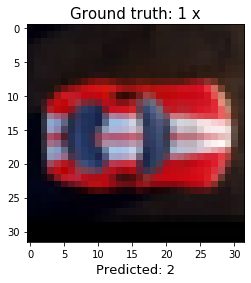

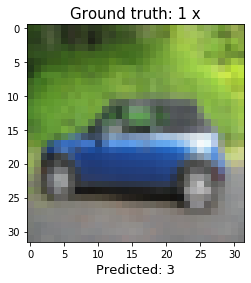

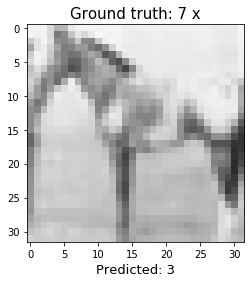

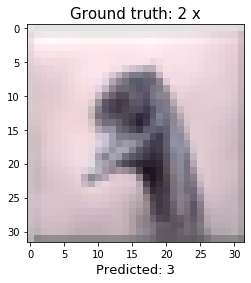

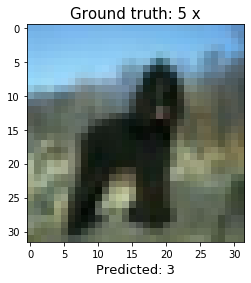

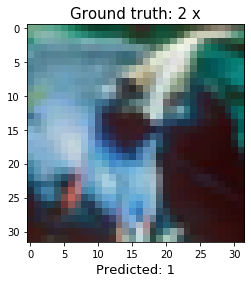

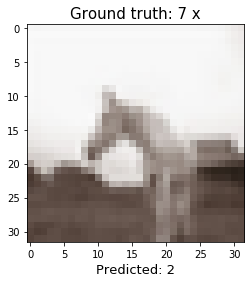

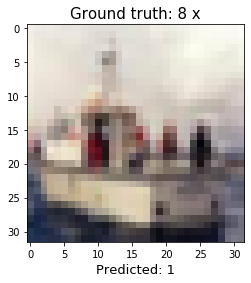

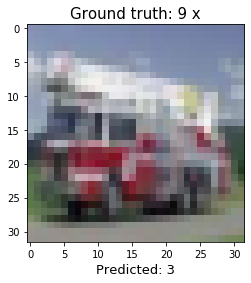

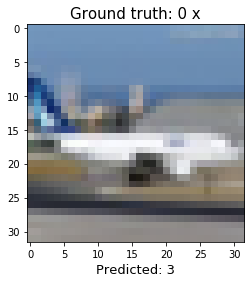

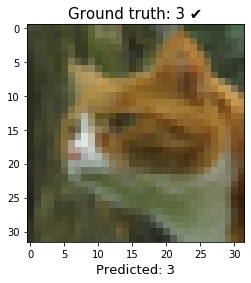

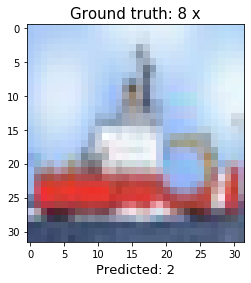

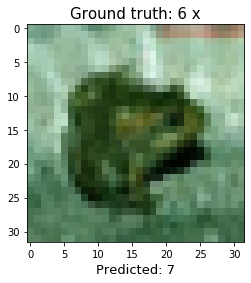

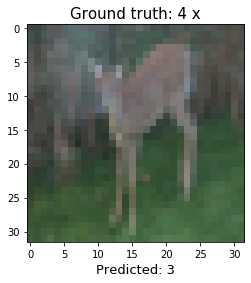

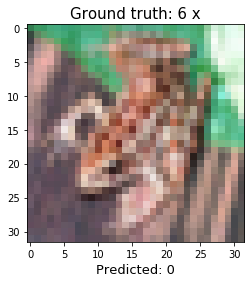

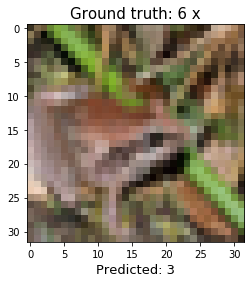

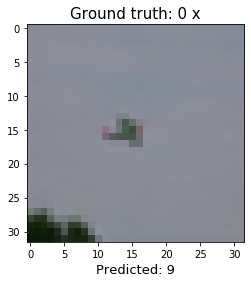

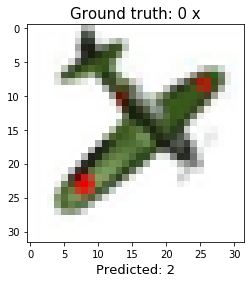

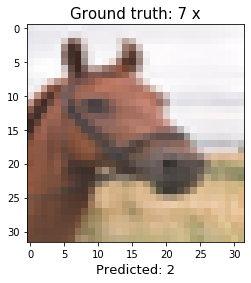

In [24]:
for i in range(100):
    img = test_input[i]
    target = test_target[i]
    pred = predictions[i]
    show_target_pred(img.cpu(), target, pred)

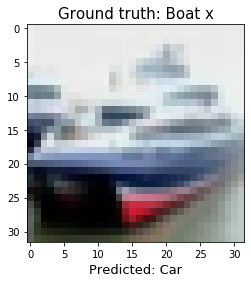

In [15]:
show_target_pred(test_input[1].cpu(), "Boat", "Car")

In [91]:
compressed = model(test_input[:100])

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [93]:
def imshow(img):
    npimg = img.numpy() / 255.0
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

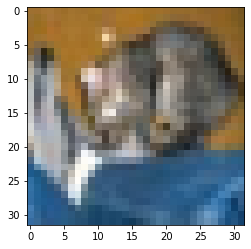

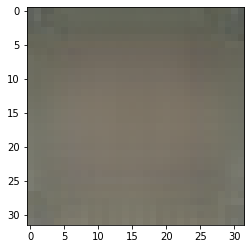

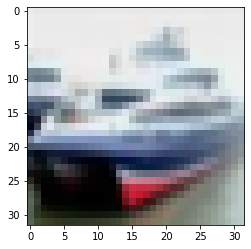

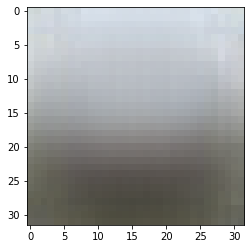

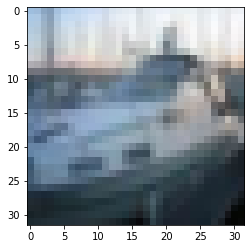

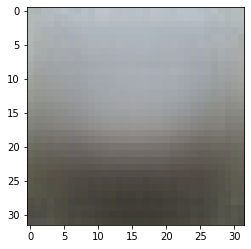

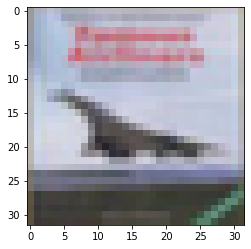

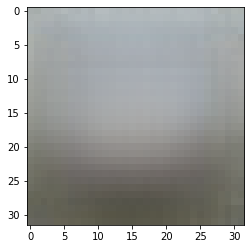

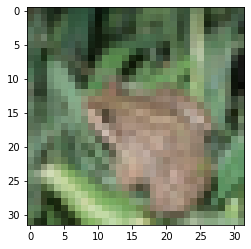

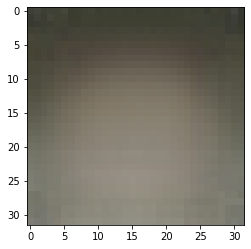

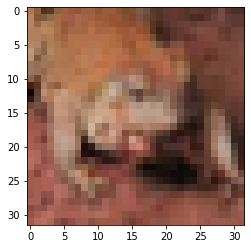

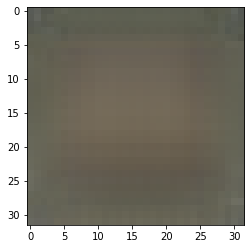

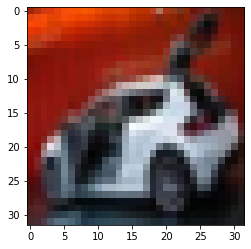

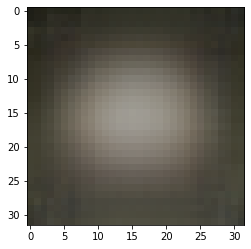

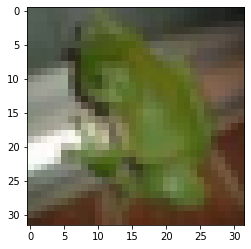

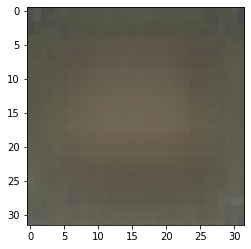

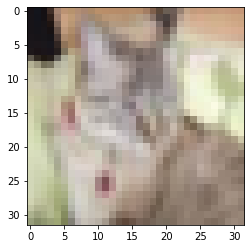

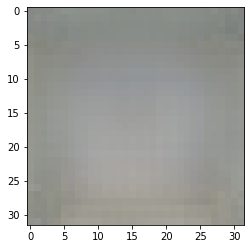

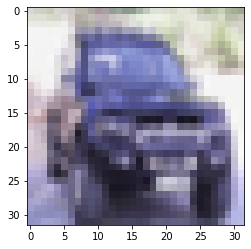

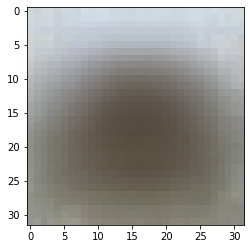

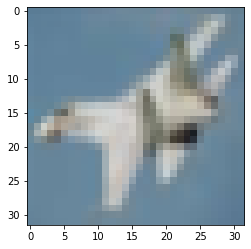

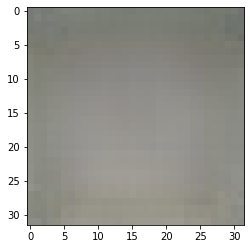

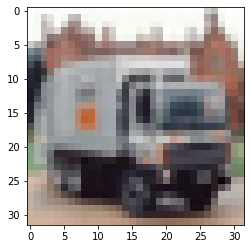

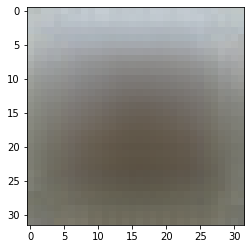

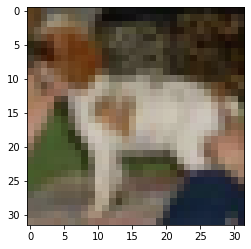

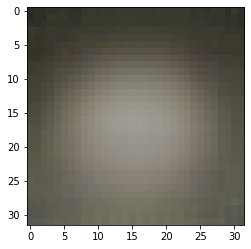

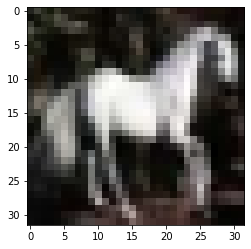

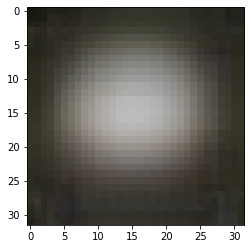

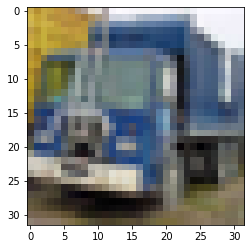

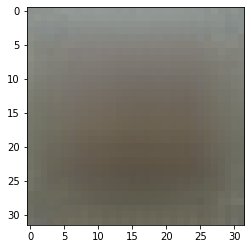

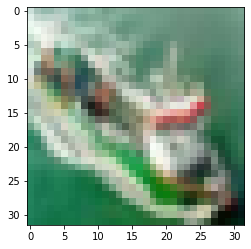

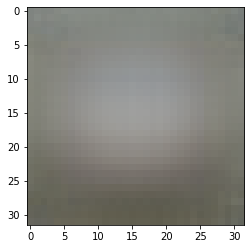

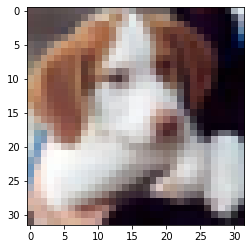

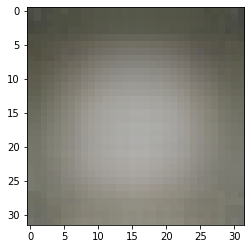

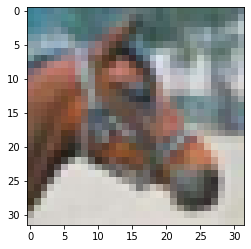

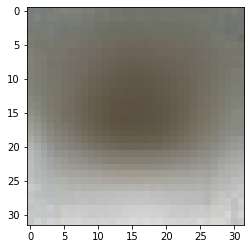

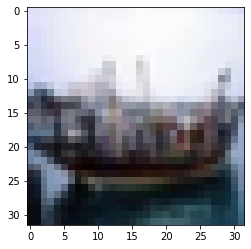

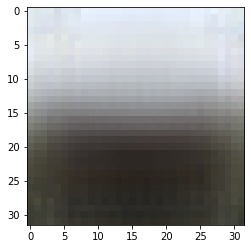

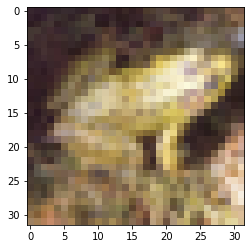

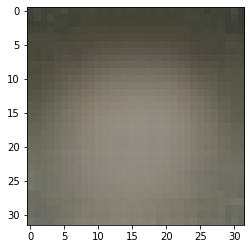

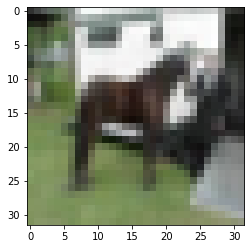

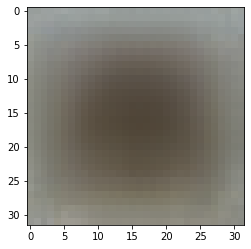

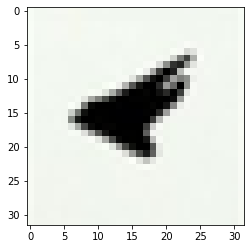

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


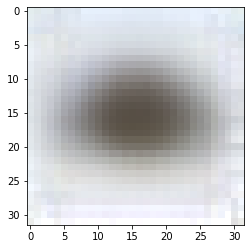

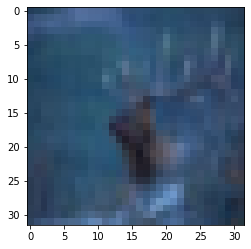

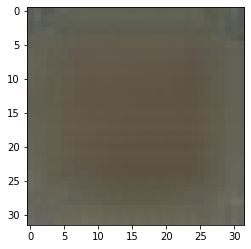

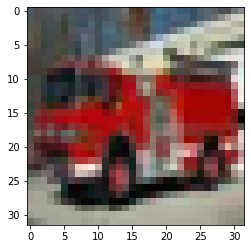

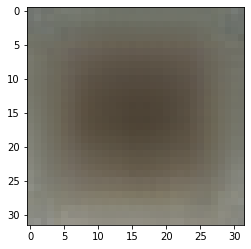

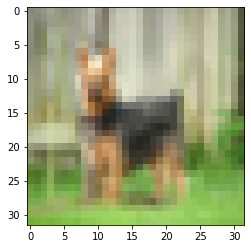

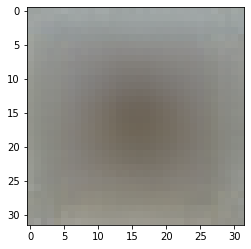

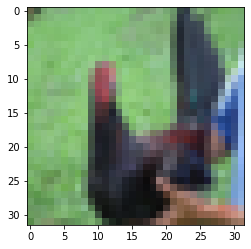

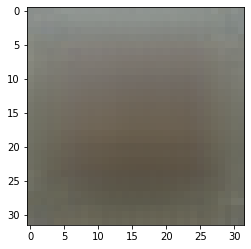

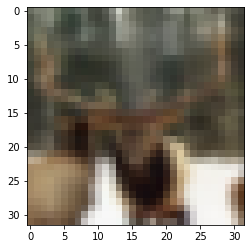

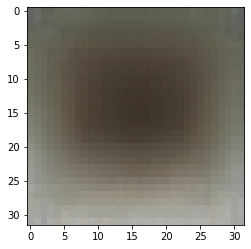

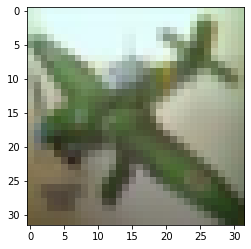

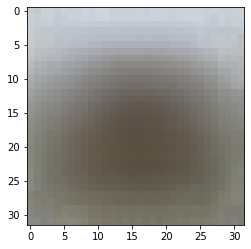

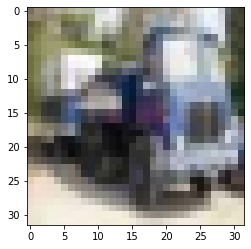

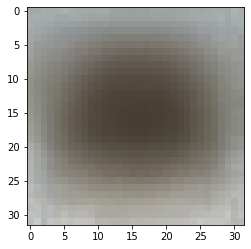

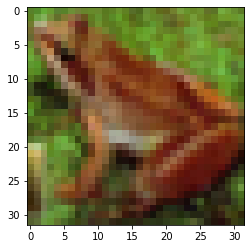

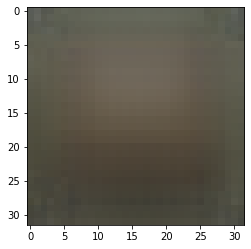

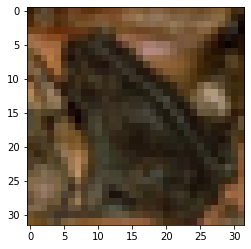

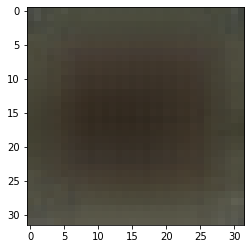

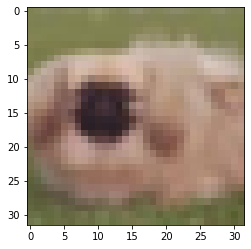

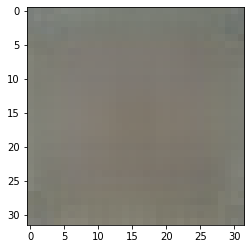

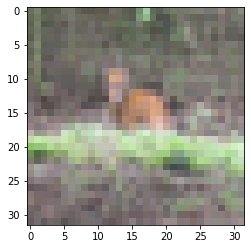

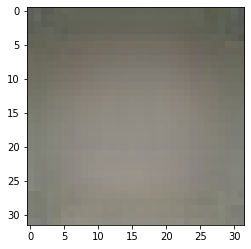

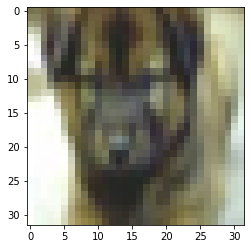

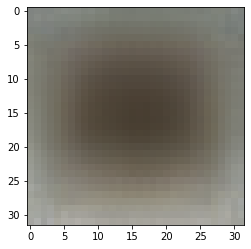

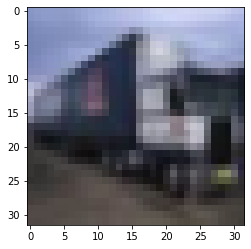

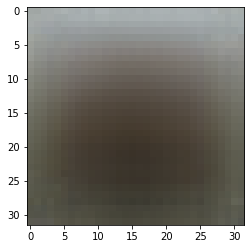

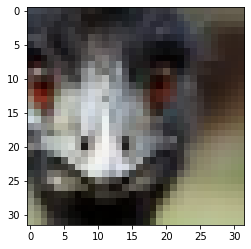

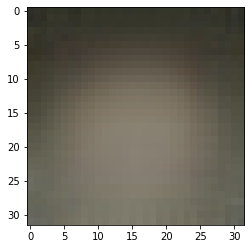

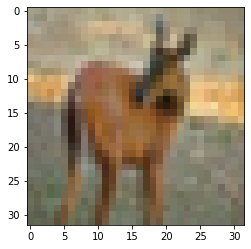

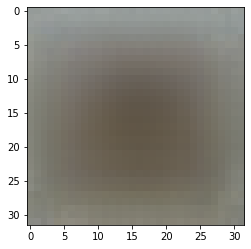

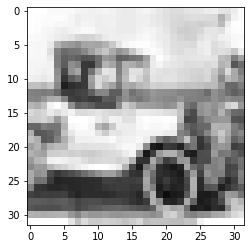

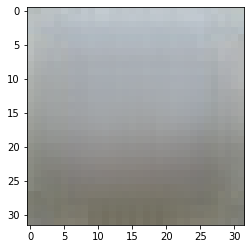

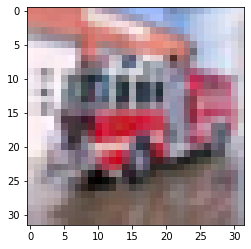

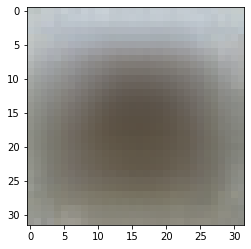

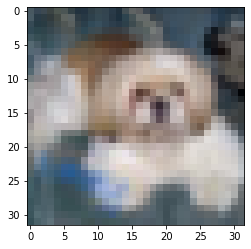

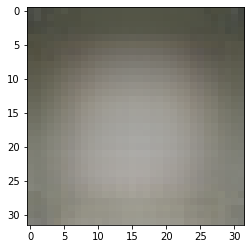

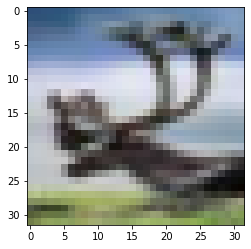

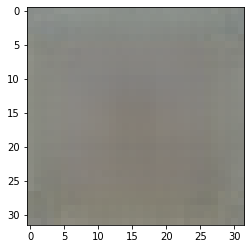

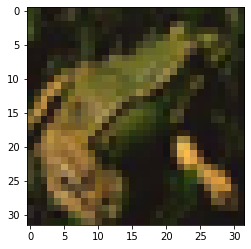

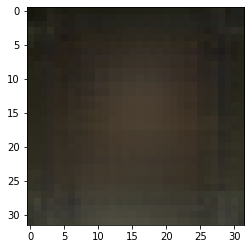

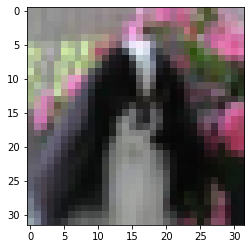

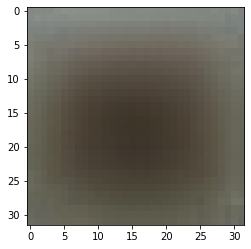

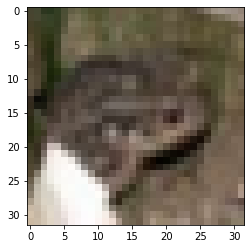

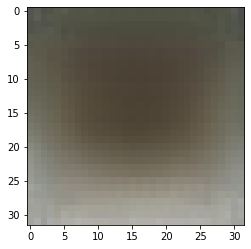

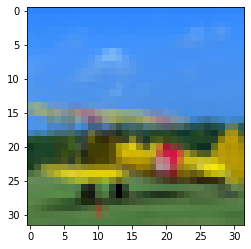

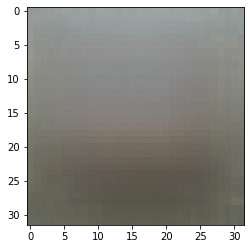

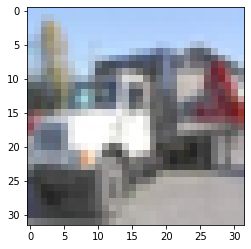

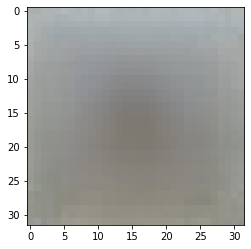

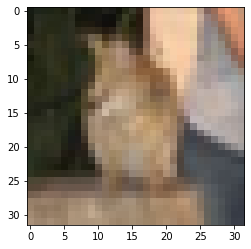

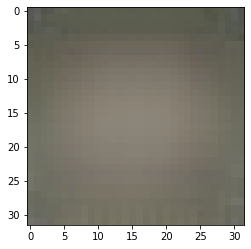

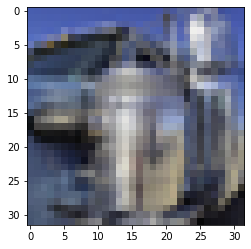

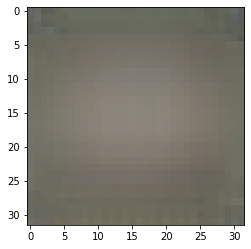

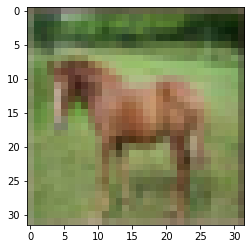

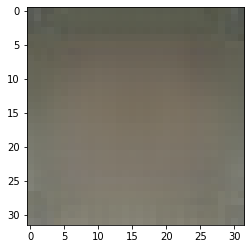

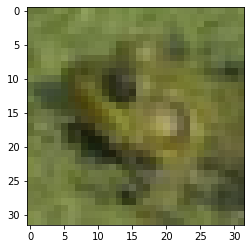

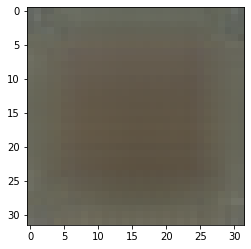

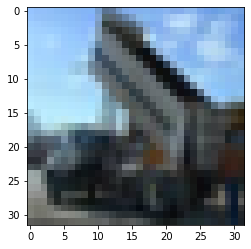

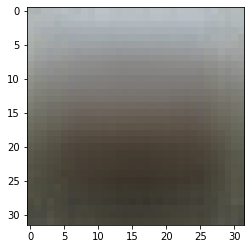

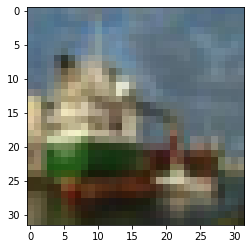

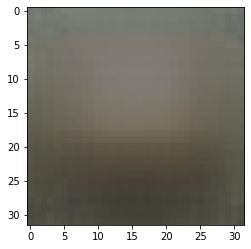

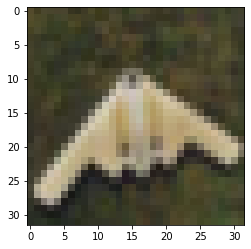

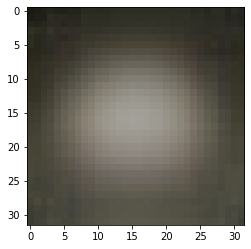

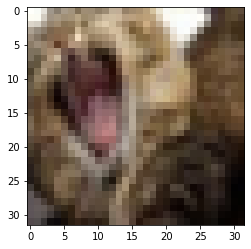

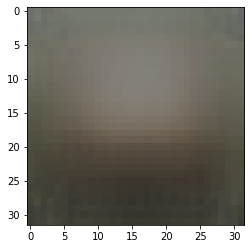

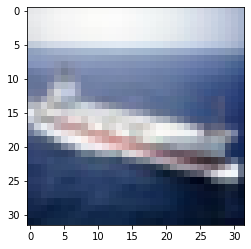

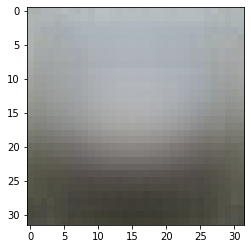

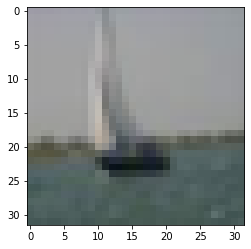

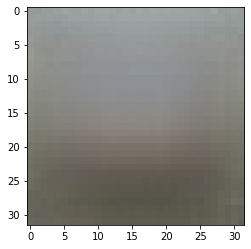

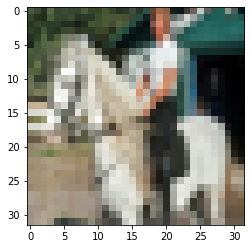

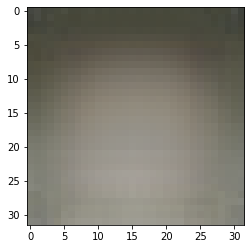

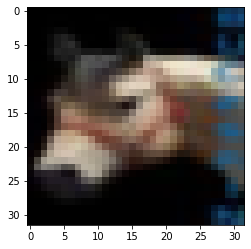

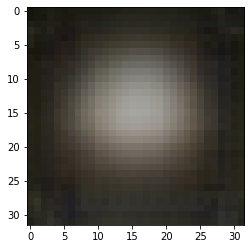

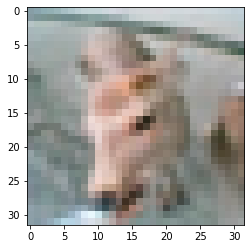

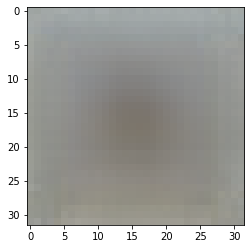

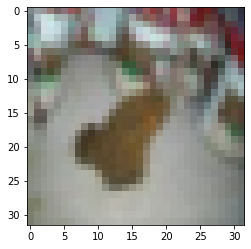

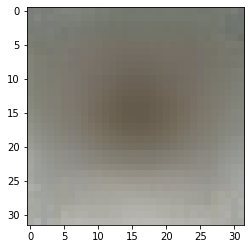

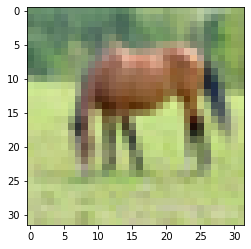

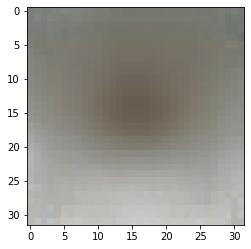

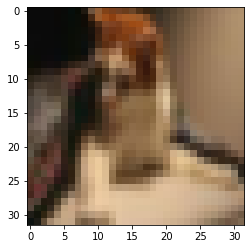

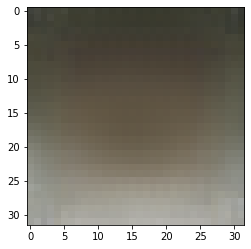

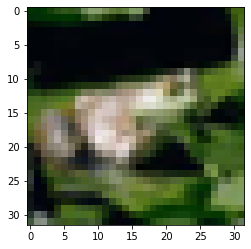

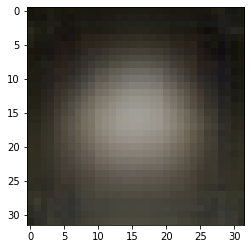

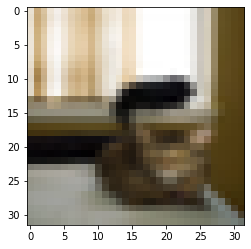

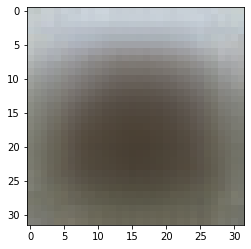

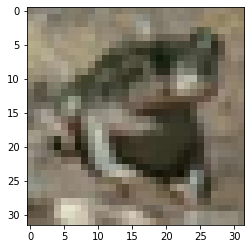

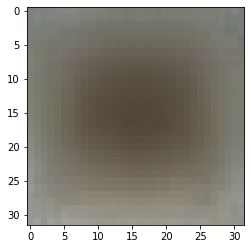

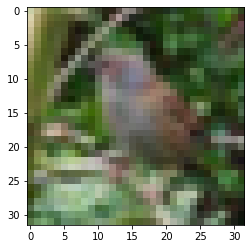

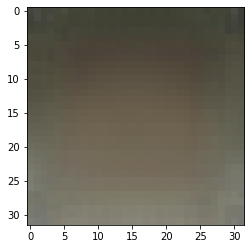

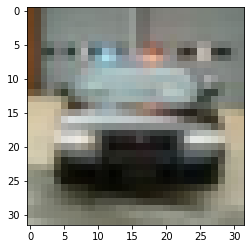

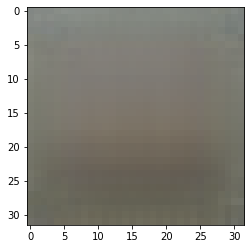

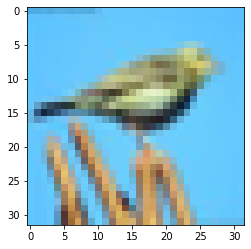

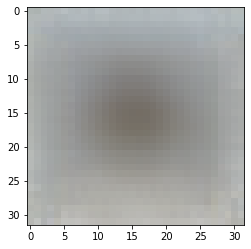

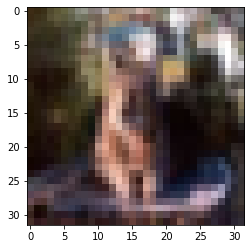

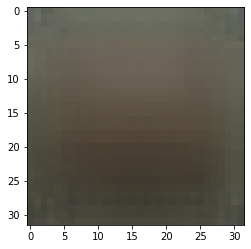

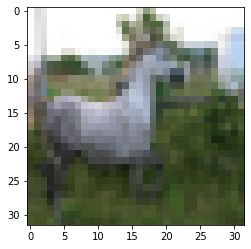

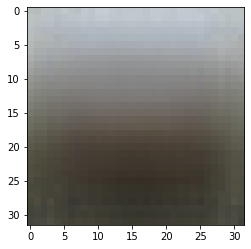

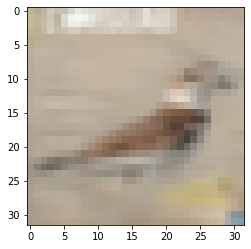

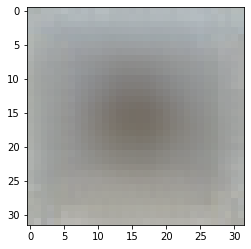

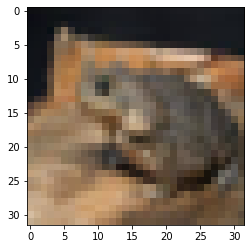

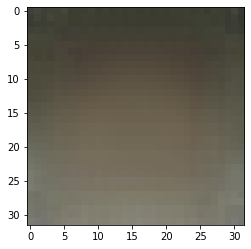

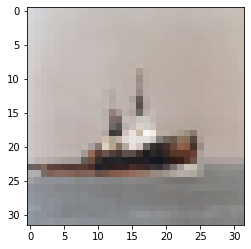

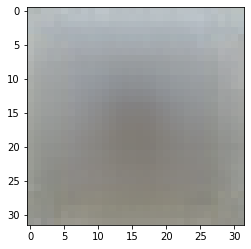

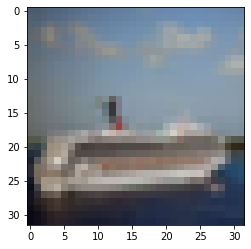

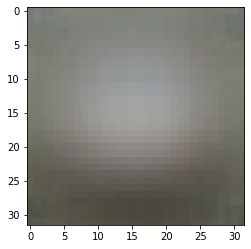

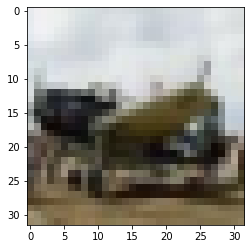

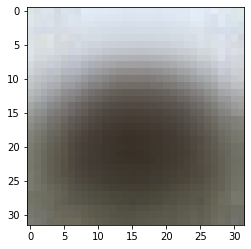

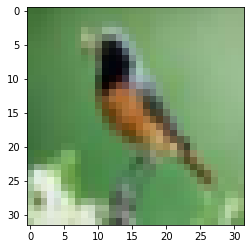

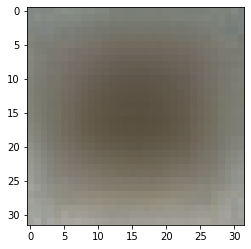

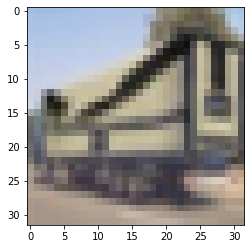

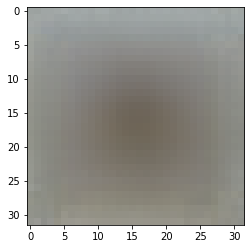

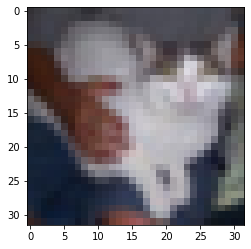

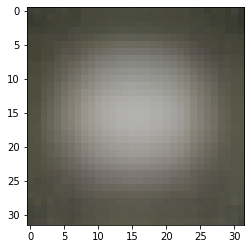

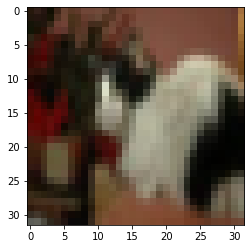

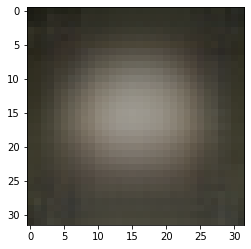

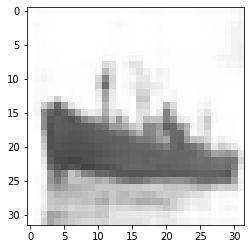

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


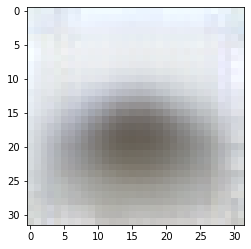

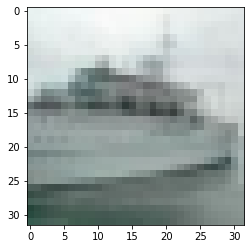

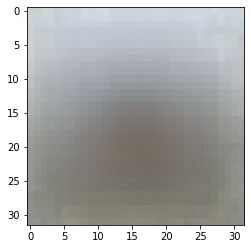

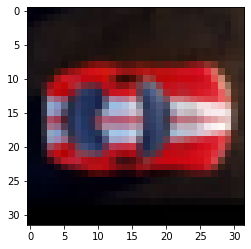

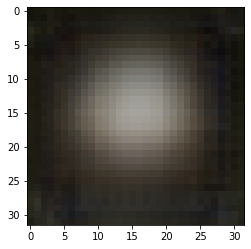

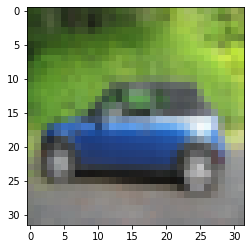

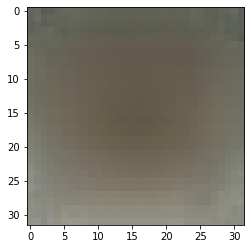

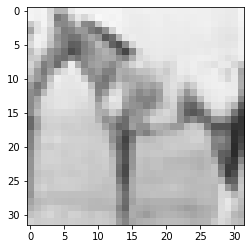

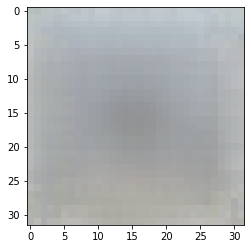

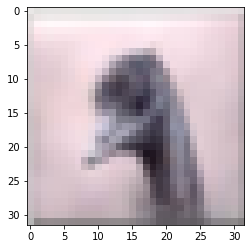

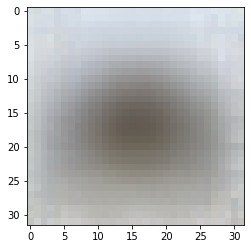

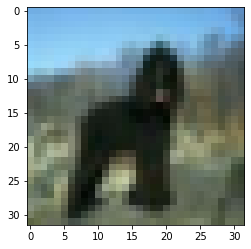

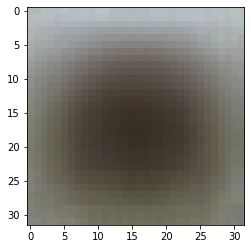

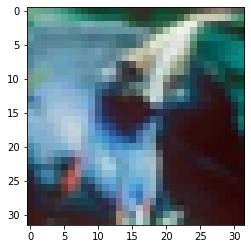

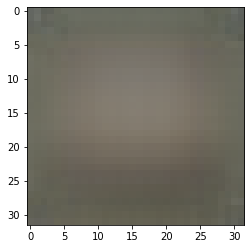

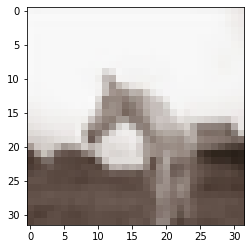

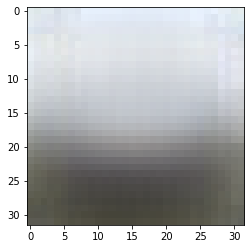

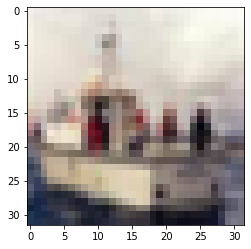

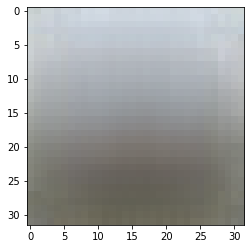

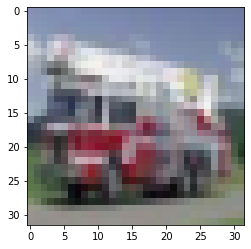

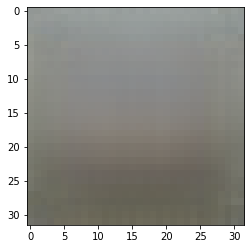

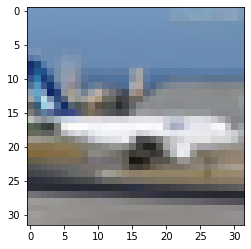

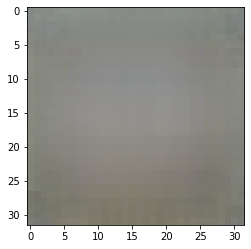

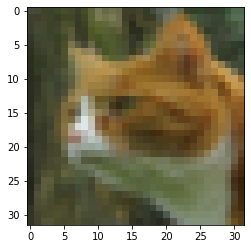

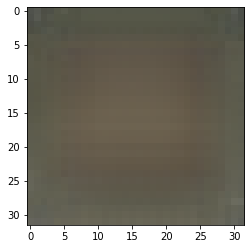

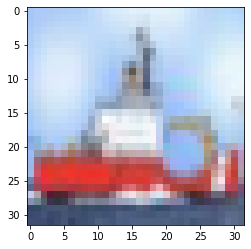

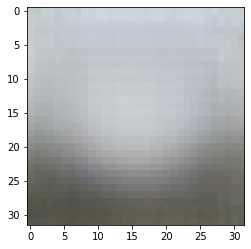

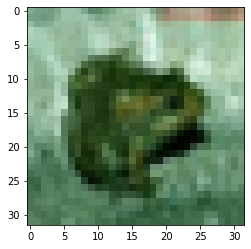

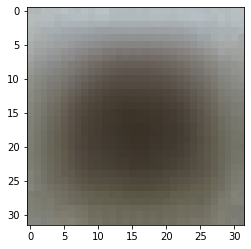

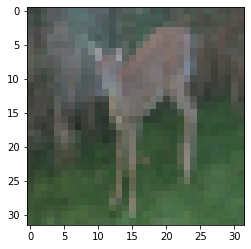

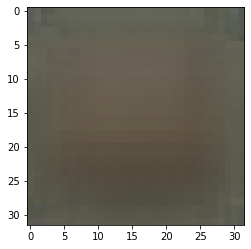

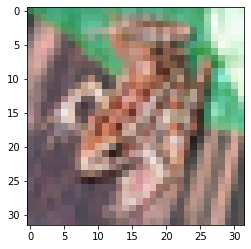

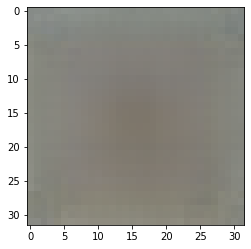

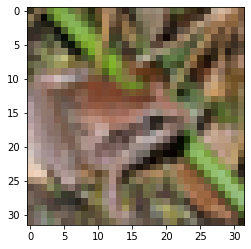

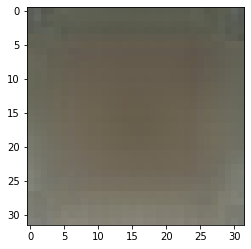

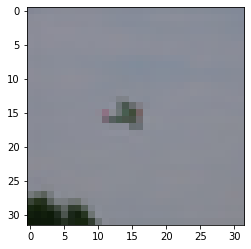

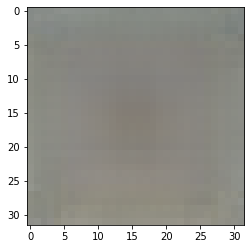

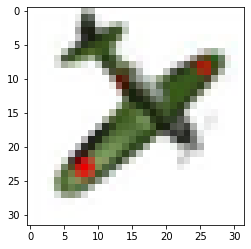

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


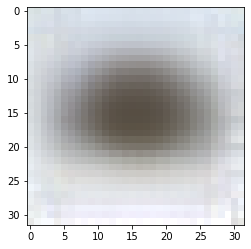

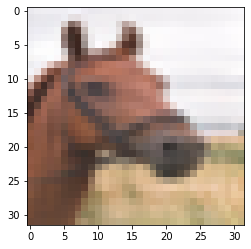

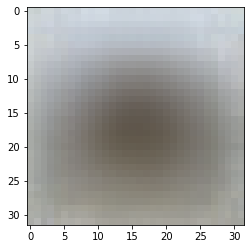

In [94]:
for index in range(100):
    imshow(test_input[index].cpu())
    imshow(compressed[index].detach().cpu())